In [6]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [10]:
data = pd.read_csv('winequality..csv')

In [12]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [16]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [18]:
pd.isnull(data).count()

type                    6497
fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64

In [20]:
#plotting correlation heatmap
import matplotlib.pyplot as plt

In [22]:
import seaborn as sb

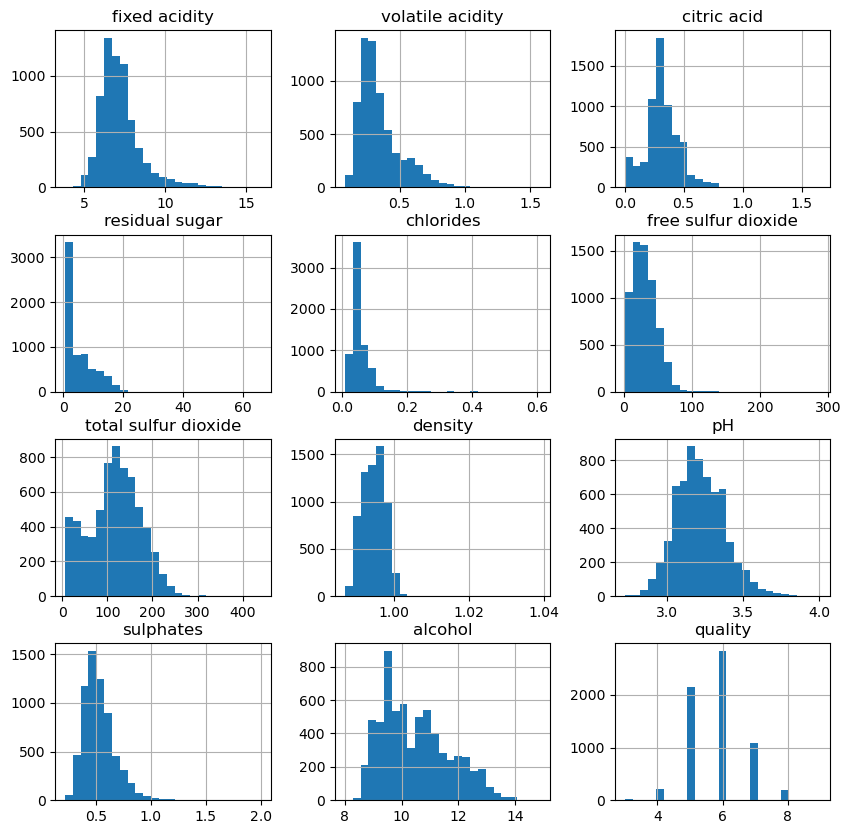

In [24]:
data.hist(bins=25, figsize=(10,10))
plt.show()

/tmp/ipykernel_1692/2469402724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(), annot=True)


<Axes: >

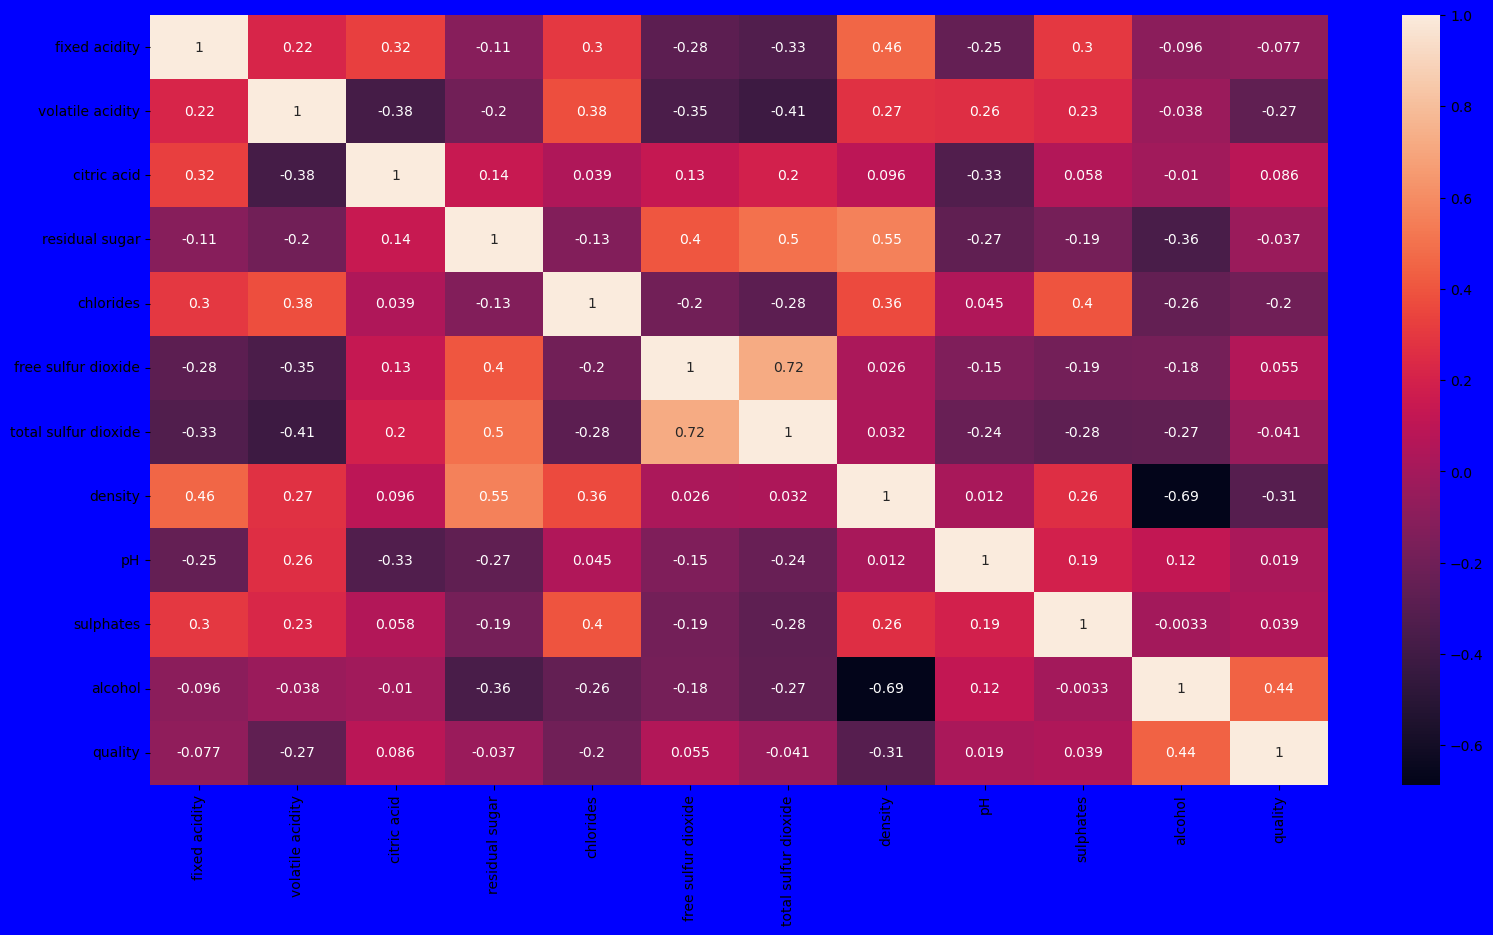

In [26]:
plt.figure(figsize=[19,10], facecolor='blue')
sb.heatmap(data.corr(), annot=True)

In [28]:
corr_matrix = data.corr().abs()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.220172     0.323736   
volatile acidity           0.220172          1.000000     0.378061   
citric acid                0.323736          0.378061     1.000000   
residual sugar             0.112319          0.196702     0.142486   
chlorides                  0.298421          0.377167     0.039315   
free sulfur dioxide        0.283317          0.353230     0.133437   
total sulfur dioxide       0.329747          0.414928     0.195218   
density                    0.459204          0.271193     0.096320   
pH                         0.251814          0.260660     0.328689   
sulphates                  0.300380          0.225476     0.057613   
alcohol                    0.095603          0.038248     0.010433   
quality                    0.077031          0.265953     0.085706   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

/tmp/ipykernel_1692/1659650184.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()


In [30]:
#removing the highly correlated variables
for a in range(len(data.corr().columns)):
    for b in range(a):
        if abs(data.corr().iloc[a,b]) > 0.7:
            name=data.corr().columns[a]
            print(name)

/tmp/ipykernel_1692/3481736096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for a in range(len(data.corr().columns)):
/tmp/ipykernel_1692/3481736096.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if abs(data.corr().iloc[a,b]) > 0.7:
/tmp/ipykernel_1692/3481736096.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  name=data.corr().columns[a]


total sulfur dioxide


In [32]:
#total sulfur dioxide column can be removed
new_data=data.drop('total sulfur dioxide', axis=1)

In [34]:
new_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


In [36]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [38]:
new_data.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [40]:
new_data.update(new_data.fillna(new_data.mean()))

/tmp/ipykernel_1692/3340562227.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.update(new_data.fillna(new_data.mean()))


In [42]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 6497 non-null   object 
 1   fixed acidity        6497 non-null   float64
 2   volatile acidity     6497 non-null   float64
 3   citric acid          6497 non-null   float64
 4   residual sugar       6497 non-null   float64
 5   chlorides            6497 non-null   float64
 6   free sulfur dioxide  6497 non-null   float64
 7   density              6497 non-null   float64
 8   pH                   6497 non-null   float64
 9   sulphates            6497 non-null   float64
 10  alcohol              6497 non-null   float64
 11  quality              6497 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 609.2+ KB


In [44]:
#separating data into features and target
data_1 = pd.get_dummies(new_data, drop_first=True)
data_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0


In [46]:
#splitting data into training and testing
X = data_1.drop(['type_white'], axis=1)
y = data_1['type_white']


In [48]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 40)

In [50]:
#Building neural network model with three hidden layers
pip install --upgrade pip

SyntaxError: invalid syntax (3772391809.py, line 2)

In [52]:
pip install tensorflow==2.13.*

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [53]:
from keras.models import Sequential

In [56]:
from keras.layers import Dense

In [58]:
model = Sequential()

In [60]:
model.add(Dense(100, activation ='relu', input_shape =(11, )))

In [62]:
model.add(Dense(100, activation ='relu'))

In [64]:
model.add(Dense(100, activation ='relu'))

In [66]:
model.add(Dense(1, activation ='sigmoid'))

In [68]:
model.output_shape

(None, 1)

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21501 (83.99 KB)
Trainable params: 21501 (83.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 11),
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': {'inp

In [74]:
model.get_weights()
model.compile(loss ='binary_crossentropy',
  optimizer ='adam', metrics =['accuracy'])

In [76]:
#Training Model
model_1 = model.fit(train_x, train_y, epochs = 20, batch_size = 1, verbose = 1)

Epoch 1/20
5197/5197 [==============================] - 8s 1ms/step - loss: 0.2936 - accuracy: 0.8790
Epoch 2/20
5197/5197 [==============================] - 7s 1ms/step - loss: 0.1928 - accuracy: 0.9282
Epoch 3/20
5197/5197 [==============================] - 7s 1ms/step - loss: 0.1693 - accuracy: 0.9411
Epoch 4/20
5197/5197 [==============================] - 7s 1ms/step - loss: 0.1572 - accuracy: 0.9463
Epoch 5/20
5197/5197 [==============================] - 7s 1ms/step - loss: 0.1522 - accuracy: 0.9479
Epoch 6/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.1391 - accuracy: 0.9523
Epoch 7/20
5197/5197 [==============================] - 8s 2ms/step - loss: 0.1323 - accuracy: 0.9586
Epoch 8/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.1296 - accuracy: 0.9594
Epoch 9/20
5197/5197 [==============================] - 9s 2ms/step - loss: 0.1342 - accuracy: 0.9546
Epoch 10/20
5197/5197 [==============================] - 7s 1ms/step - loss: 0.127

In [180]:
y_pred = model.predict(test_x)
print(y_pred)

41/41 [==============================] - 0s 1ms/step
[[0.960317  ]
 [0.00715904]
 [0.92797065]
 ...
 [0.8378997 ]
 [0.00226118]
 [0.9634776 ]]


In [80]:
pred_y = np.round(model.predict(test_x))

41/41 [==============================] - 0s 1ms/step


In [82]:
pred_y[0:10]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [184]:
loss, acc = model.evaluate(test_x, test_y, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.951


In [86]:
loss1, acc1 = model.evaluate(train_x, train_y, verbose=0)
print('Train Accuracy: %.3f' % acc)

Train Accuracy: 0.956


In [88]:
from sklearn import metrics

In [90]:
print(pd.DataFrame(metrics.confusion_matrix(test_y, pred_y, labels=[0 ,1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

            pred:White  pred:Red
true:White         319         7
true:Red            50       924


In [92]:
print(model_1.history)

{'loss': [0.29359617829322815, 0.19281405210494995, 0.16931305825710297, 0.1571977436542511, 0.15224331617355347, 0.13905595242977142, 0.13229237496852875, 0.12956707179546356, 0.1341504603624344, 0.1273222416639328, 0.12598459422588348, 0.12209377437829971, 0.1235726997256279, 0.12171253561973572, 0.11466733366250992, 0.11949273198843002, 0.1139337420463562, 0.11677990108728409, 0.11395793408155441, 0.11154043674468994], 'accuracy': [0.8789686560630798, 0.9282278418540955, 0.9411198496818542, 0.9463151693344116, 0.9478545188903809, 0.9522801637649536, 0.9586299657821655, 0.9593996405601501, 0.9545891880989075, 0.9553588628768921, 0.9580526947975159, 0.9595920443534851, 0.9590148329734802, 0.9584375619888306, 0.9611313939094543, 0.961901068687439, 0.9624783396720886, 0.9630556106567383, 0.9613238573074341, 0.9653646349906921]}


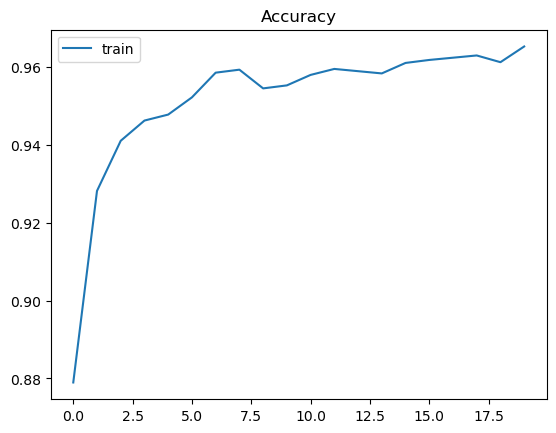

In [94]:
%matplotlib inline
from matplotlib import pyplot
from numpy import where

pyplot.subplot(111)
pyplot.title('Accuracy')
pyplot.plot(model_1.history['accuracy'], label='train')
pyplot.legend()

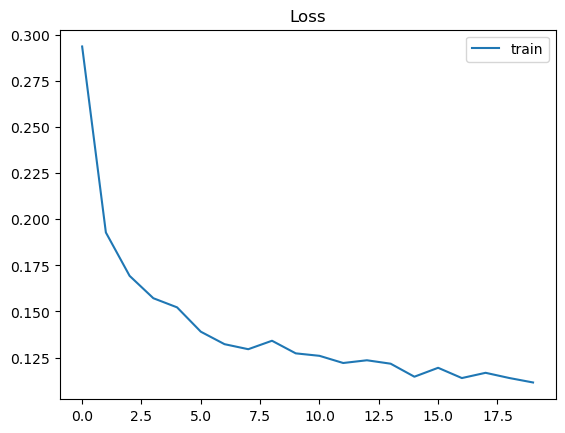

In [96]:
pyplot.subplot(111)
pyplot.title('Loss')
pyplot.plot(model_1.history['loss'], label='train')
pyplot.legend()

In [98]:
from keras import regularizers

In [ ]:
#Dropout + early stopping

In [123]:
from keras.callbacks import EarlyStopping

In [125]:
from tensorflow.keras.layers import Dropout

In [127]:
model = Sequential()

In [129]:
model.add(Dropout(0.2, input_shape=(11,)))

In [131]:
model.add(Dense(100, activation ='relu', input_shape =(11, )))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [133]:
from tensorflow.keras.optimizers import SGD

In [135]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [137]:
model_4 = model.fit(train_x, train_y, epochs=10, batch_size=1, validation_data=(test_x, test_y)
 , callbacks = [EarlyStopping(monitor='val_acc', patience=2)])

Epoch 1/10
5197/5197 [==============================] - 10s 2ms/step - loss: 0.3917 - accuracy: 0.8214 - val_loss: 0.3632 - val_accuracy: 0.8231
Epoch 2/10
5197/5197 [==============================] - 9s 2ms/step - loss: 0.3252 - accuracy: 0.8591 - val_loss: 0.2142 - val_accuracy: 0.9192
Epoch 3/10
5197/5197 [==============================] - 8s 2ms/step - loss: 0.3023 - accuracy: 0.8784 - val_loss: 0.2551 - val_accuracy: 0.9038
Epoch 4/10
5197/5197 [==============================] - 8s 2ms/step - loss: 0.2858 - accuracy: 0.8890 - val_loss: 0.2452 - val_accuracy: 0.9308
Epoch 5/10
5197/5197 [==============================] - 8s 2ms/step - loss: 0.2810 - accuracy: 0.8896 - val_loss: 0.1741 - val_accuracy: 0.9315
Epoch 6/10
5197/5197 [==============================] - 9s 2ms/step - loss: 0.2858 - accuracy: 0.8859 - val_loss: 0.1826 - val_accuracy: 0.9292
Epoch 7/10
5197/5197 [==============================] - 10s 2ms/step - loss: 0.2685 - accuracy: 0.8972 - val_loss: 0.1915 - val_accurac

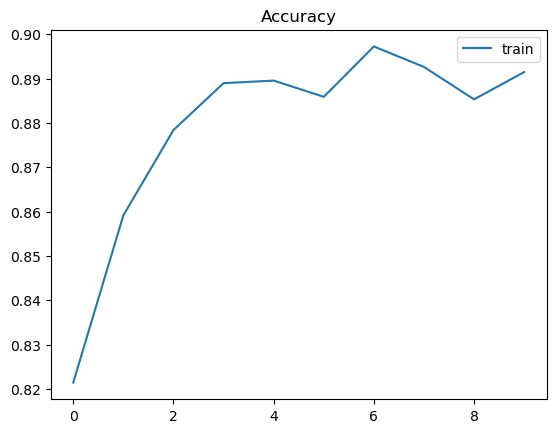

In [139]:
pyplot.subplot(111)
pyplot.title('Accuracy')
pyplot.plot(model_4.history['accuracy'], label='train')
pyplot.legend()

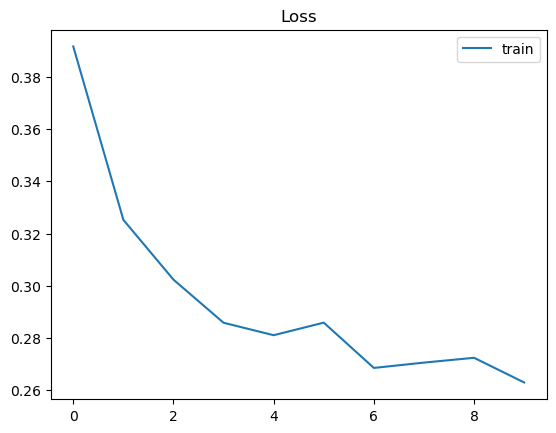

In [143]:
pyplot.subplot(111)
pyplot.title('Loss')
pyplot.plot(model_4.history['loss'], label='train')
pyplot.legend()

In [146]:
#L2 + early stopping
model = Sequential()

In [148]:
model.add(Dense(100, activation ='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape =(11, )))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1, activation='sigmoid'))

In [150]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
model_3 = model.fit(train_x, train_y, epochs=10, batch_size=1, validation_data=(test_x, test_y)
 , callbacks = [EarlyStopping(monitor='val_acc', patience=2)])

Epoch 1/10
5197/5197 [==============================] - 14s 2ms/step - loss: 0.3022 - accuracy: 0.8774 - val_loss: 0.1798 - val_accuracy: 0.9323
Epoch 2/10
5197/5197 [==============================] - 11s 2ms/step - loss: 0.2029 - accuracy: 0.9298 - val_loss: 0.1628 - val_accuracy: 0.9454
Epoch 3/10
5197/5197 [==============================] - 11s 2ms/step - loss: 0.1733 - accuracy: 0.9442 - val_loss: 0.1322 - val_accuracy: 0.9569
Epoch 4/10
5197/5197 [==============================] - 11s 2ms/step - loss: 0.1633 - accuracy: 0.9434 - val_loss: 0.1777 - val_accuracy: 0.9346
Epoch 5/10
5197/5197 [==============================] - 12s 2ms/step - loss: 0.1521 - accuracy: 0.9488 - val_loss: 0.1101 - val_accuracy: 0.9577
Epoch 6/10
5197/5197 [==============================] - 12s 2ms/step - loss: 0.1482 - accuracy: 0.9538 - val_loss: 0.1499 - val_accuracy: 0.9431
Epoch 7/10
5197/5197 [==============================] - 15s 3ms/step - loss: 0.1448 - accuracy: 0.9530 - val_loss: 0.1085 - val_ac

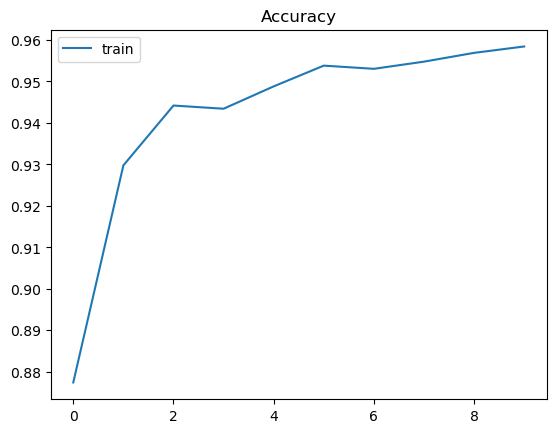

In [154]:
pyplot.subplot(111)
pyplot.title('Accuracy')
pyplot.plot(model_3.history['accuracy'], label='train')
pyplot.legend()

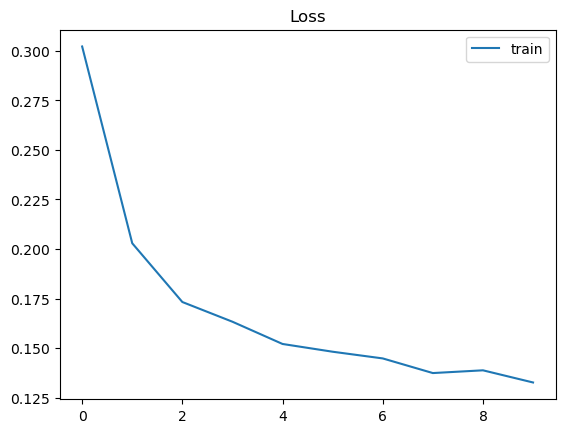

In [156]:
pyplot.subplot(111)
pyplot.title('Loss')
pyplot.plot(model_3.history['loss'], label='train')
pyplot.legend()

In [160]:
#Early stopping
model = Sequential()

In [162]:
model.add(Dense(100, activation ='relu', input_shape =(11, )))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [164]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
model_2 = model.fit(train_x, train_y, epochs=10, batch_size=1, validation_data=(test_x, test_y)
 , callbacks = [EarlyStopping(monitor='val_acc', patience=2)])

Epoch 1/10
5197/5197 [==============================] - 11s 2ms/step - loss: 0.2944 - accuracy: 0.8784 - val_loss: 0.1809 - val_accuracy: 0.9269
Epoch 2/10
5197/5197 [==============================] - 10s 2ms/step - loss: 0.1941 - accuracy: 0.9302 - val_loss: 0.1420 - val_accuracy: 0.9446
Epoch 3/10
5197/5197 [==============================] - 13s 2ms/step - loss: 0.1664 - accuracy: 0.9411 - val_loss: 0.1517 - val_accuracy: 0.9485
Epoch 4/10
5197/5197 [==============================] - 10s 2ms/step - loss: 0.1570 - accuracy: 0.9461 - val_loss: 0.1365 - val_accuracy: 0.9500
Epoch 5/10
5197/5197 [==============================] - 10s 2ms/step - loss: 0.1476 - accuracy: 0.9517 - val_loss: 0.1330 - val_accuracy: 0.9546
Epoch 6/10
5197/5197 [==============================] - 8s 2ms/step - loss: 0.1437 - accuracy: 0.9515 - val_loss: 0.1055 - val_accuracy: 0.9585
Epoch 7/10
5197/5197 [==============================] - 9s 2ms/step - loss: 0.1356 - accuracy: 0.9542 - val_loss: 0.1175 - val_accu

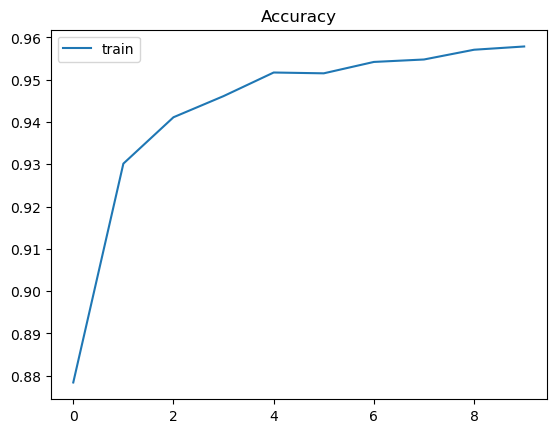

In [168]:
pyplot.subplot(111)
pyplot.title('Accuracy')
pyplot.plot(model_2.history['accuracy'], label='train')
pyplot.legend()

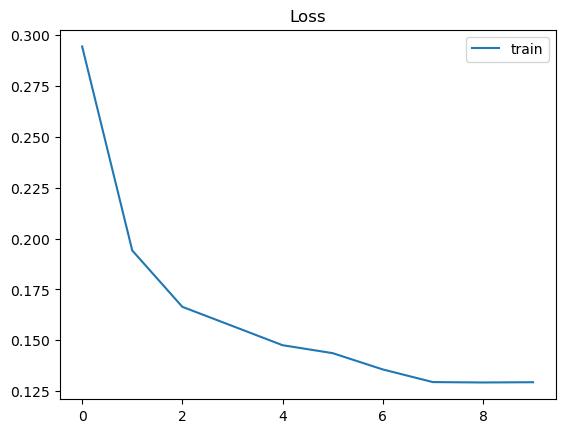

In [172]:
pyplot.subplot(111)
pyplot.title('Loss')
pyplot.plot(model_2.history['loss'], label='train')
pyplot.legend()